In [1]:
import glob
import cv2
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

from model_single_train import ModelSingleTrain
from model_cross_validation import ModelCrossValidation

In [2]:
FOLD_NUMBER = 5
SEED = 420

In [3]:
import matplotlib.pyplot as plt # read data

base_folder = "C:/Users/Acer/Desktop/szkola/wizja/prezentacja/Mild-Depression-Detection/preprocessed_data"

data = [[] for x in range(25)]
labels = [[] for x in range(25)]

for i in glob.glob(f'{base_folder}/**/*.png', recursive=True):
    index = int((i.split('-slice_')[1]).split('.png')[0])-1
    data[index].append(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY))
    patient_index = (int((i.split('\\patient_')[1]).split('\\')[0])) - 1
    if patient_index < 51:
        labels[index].append(1)
    else:
        labels[index].append(0)
all_data = len(data)

In [4]:
data = np.array(data)
print(data.shape)
labels = np.array(labels)
print(labels.shape)

(25, 72, 112, 112)
(25, 72)


In [5]:
# reshape 4d to 2d
# based on https://bic-berkeley.github.io/psych-214-fall-2016/reshape_and_4d.html
new_data = []
for slice_data in data:
    vol_shape = slice_data.shape[1:]
    #print(vol_shape)
    n_voxels = np.prod(vol_shape)
    #print(n_voxels)
    reshaped_data = slice_data.reshape(n_voxels, slice_data.shape[0])
    slice_data = np.transpose(reshaped_data)
    #print(slice_data.shape)
    new_data.append(slice_data)

data = np.array(new_data)
print(data.shape)

(25, 72, 12544)


### SVM

In [6]:
svm_clf = svm.SVC(kernel='linear', probability=True, random_state=SEED)

#### Single train


avg balanced accuracy 0.9633333333333336

avg precision 0.9736000000000001

avg recall 0.9706666666666668

avg f1 score 0.0372822966507177



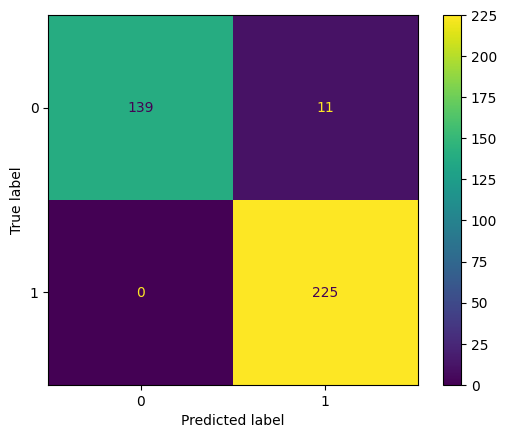

In [30]:
b_acc_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
cm_sum = np.array([[0,0],[0,0]])
for slice_labels, slice_data in zip(labels,data):
    X_train, X_test, y_train, y_test = train_test_split(slice_data, slice_labels, test_size=0.2, random_state=SEED)
    svm_model_object = ModelSingleTrain(svm_clf, X_train, y_train, X_test, y_test, SEED)
    (b_accuracy, precision, recall, f1, cm) = svm_model_object.train_and_get_metrics()
    b_acc_sum += b_accuracy
    precision_sum += precision
    recall_sum += recall
    f1_sum = f1
    cm_sum += cm
data_num = data.shape[0]
b_acc_sum /= data_num
precision_sum /= data_num
recall_sum /= data_num
f1_sum /= data_num

set_name = 'avg'

print()
print(f"{set_name} balanced accuracy {b_acc_sum}")
print()
print(f"{set_name} precision {precision_sum}")
print()
print(f"{set_name} recall {recall_sum}")
print()
print(f"{set_name} f1 score {f1_sum}")
print()

svm_model_object.show_cm(cm_sum)

### Random Forest

In [31]:
rf_clf = RandomForestClassifier(random_state=SEED, 
                                n_estimators=50, 
                                criterion="entropy")

#### Single Train


avg balanced accuracy 0.956666666666667

avg precision 0.9688000000000003

avg recall 0.9653333333333335

avg f1 score 0.0372822966507177



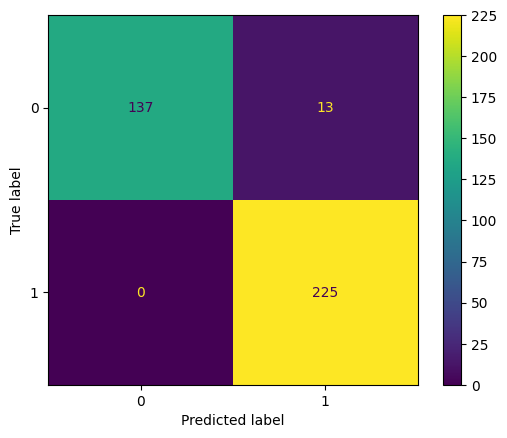

In [32]:
b_acc_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
cm_sum = np.array([[0,0],[0,0]])
for slice_labels, slice_data in zip(labels,data):
    X_train, X_test, y_train, y_test = train_test_split(slice_data, slice_labels, test_size=0.2, random_state=SEED)
    svm_model_object = ModelSingleTrain(rf_clf, X_train, y_train, X_test, y_test, SEED)
    (b_accuracy, precision, recall, f1, cm) = svm_model_object.train_and_get_metrics()
    b_acc_sum += b_accuracy
    precision_sum += precision
    recall_sum += recall
    f1_sum = f1
    cm_sum += cm
data_num = data.shape[0]
b_acc_sum /= data_num
precision_sum /= data_num
recall_sum /= data_num
f1_sum /= data_num

set_name = 'avg'

print()
print(f"{set_name} balanced accuracy {b_acc_sum}")
print()
print(f"{set_name} precision {precision_sum}")
print()
print(f"{set_name} recall {recall_sum}")
print()
print(f"{set_name} f1 score {f1_sum}")
print()

svm_model_object.show_cm(cm_sum)

### XGBoost

In [33]:
xgb_clf = XGBClassifier(booster='gbtree',
                        eta = 0.2,
                        min_child_weight=1,
                        max_depth=5,
                        gamma=0.5,
                        random_state=SEED)

#### Single Train


avg balanced accuracy 0.9500000000000002

avg precision 0.9644363636363639

avg recall 0.9600000000000002

avg f1 score 0.0372822966507177



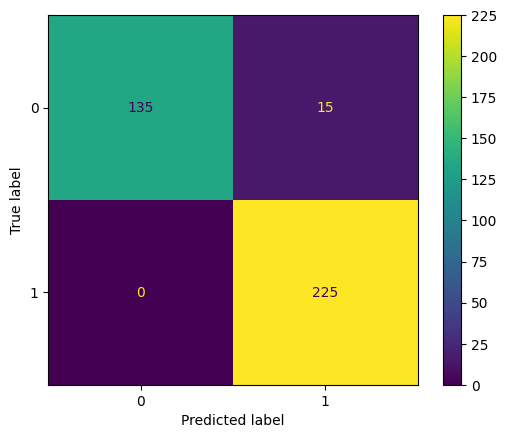

In [34]:
b_acc_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
cm_sum = np.array([[0,0],[0,0]])
for slice_labels, slice_data in zip(labels,data):
    X_train, X_test, y_train, y_test = train_test_split(slice_data, slice_labels, test_size=0.2, random_state=SEED)
    svm_model_object = ModelSingleTrain(xgb_clf, X_train, y_train, X_test, y_test, SEED)
    (b_accuracy, precision, recall, f1, cm) = svm_model_object.train_and_get_metrics()
    b_acc_sum += b_accuracy
    precision_sum += precision
    recall_sum += recall
    f1_sum = f1
    cm_sum += cm
data_num = data.shape[0]
b_acc_sum /= data_num
precision_sum /= data_num
recall_sum /= data_num
f1_sum /= data_num

set_name = 'avg'

print()
print(f"{set_name} balanced accuracy {b_acc_sum}")
print()
print(f"{set_name} precision {precision_sum}")
print()
print(f"{set_name} recall {recall_sum}")
print()
print(f"{set_name} f1 score {f1_sum}")
print()

svm_model_object.show_cm(cm_sum)

### AdaBoost

In [35]:
adb_clf = AdaBoostClassifier(n_estimators=100, 
                            random_state=SEED)

#### Single Train


avg balanced accuracy 0.9466666666666669

avg precision 0.9620363636363638

avg recall 0.9573333333333335

avg f1 score 0.0372822966507177



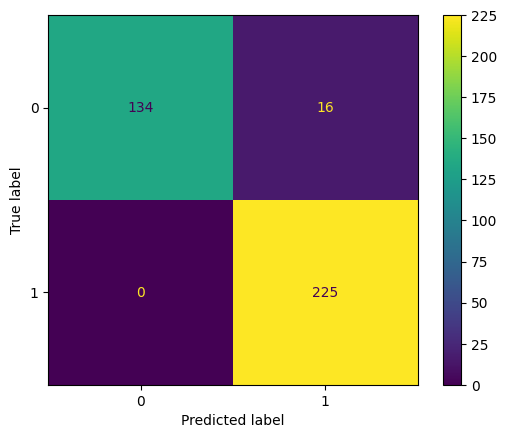

In [38]:
b_acc_sum = 0
precision_sum = 0
recall_sum = 0
f1_sum = 0
cm_sum = np.array([[0,0],[0,0]])
for slice_labels, slice_data in zip(labels,data):
    X_train, X_test, y_train, y_test = train_test_split(slice_data, slice_labels, test_size=0.2, random_state=SEED)
    svm_model_object = ModelSingleTrain(adb_clf, X_train, y_train, X_test, y_test, SEED)
    (b_accuracy, precision, recall, f1, cm) = svm_model_object.train_and_get_metrics()
    b_acc_sum += b_accuracy
    precision_sum += precision
    recall_sum += recall
    f1_sum = f1
    cm_sum += cm
data_num = data.shape[0]
b_acc_sum /= data_num
precision_sum /= data_num
recall_sum /= data_num
f1_sum /= data_num

set_name = 'avg'

print()
print(f"{set_name} balanced accuracy {b_acc_sum}")
print()
print(f"{set_name} precision {precision_sum}")
print()
print(f"{set_name} recall {recall_sum}")
print()
print(f"{set_name} f1 score {f1_sum}")
print()

svm_model_object.show_cm(cm_sum)